# Koneoppiminen: Osa 3: Naiivi Bayes-luokittelija

In [ ]:
# Kirjoita tähän tietosi!
student_name = 'Samuli Kotiranta'
student_id = 'AB8349'

## Tehtävä 1
### Aihe: Artificial Characters Data Set (4 pistettä)

1. Tutustu *Wine Data Set* -aineistoon osoitteessa https://archive.ics.uci.edu/ml/datasets/Wine .

2. Lataa aineisto ja aseta sarakkeiden nimet. 

3. Jaa aineisto koulutus- ja testausaineistoon käyttäen `scikit-learn`-kirjaston [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)-funktiota.  

4. Normalisoi sarakkeet välille 0...1 `scikit-learn`-kirjaston `preprocessing`-moduulin [minmax_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale)-funktiolla.

- Tallenna koulutusaineisto ja sen luokkamuuttuja muuttujiin `X_train`, `y_train`,
- ja toisaalta testausaineiston `X_test`, `y_test`. 

Aseta testausjoukon kooksi 33% ja satunnaisuuden siemeneksi `1900`.

Vinkki: älä skaalaa luokkamuuttujaa. 

Vinkki: muista että luokkamuuttuja ei mene `X`-muuttujiin.

In [2]:
# Kirjoita toteutuksesi tähän soluun. 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#luetaan data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd.read_csv(url)

#attribuutit
#tämä on jatkoa ajatellen kätevä tapa
attr = ['type',
        'Alcohol',
        'Malic acid',
        'Ash',
        'Alcalinity of ash',
        'Magnesium',
        'Total phenols',
        'Flavanoids',
        'Nonflavanoid phenols',
        'Proanthocyanins',
        'Color intensity',
        'Hue',
        'OD280/OD315 of diluted wines',
        'Proline']
df.columns = attr

#luokkamuuttujan eristäminen ja aineiston splittaus
X = df.drop(columns='type')
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1900)

#skaalaus ja aineiston jako
mms = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(mms.transform(X_train), columns=attr[1:])
X_test = pd.DataFrame(mms.transform(X_test), columns=attr[1:])

In [3]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tallenna vastauksesi X_train- X_test-muuttujiin.
print(f'X_train columns: {X_train.columns}')
print(f'X_train: {X_train}')
print(f'X_test: {X_test}')

X_train columns: Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')
X_train:       Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0    0.112903    0.317227  0.566845           0.484536   0.282609   
1    0.766129    0.871849  0.465241           0.484536   0.108696   
2    0.478495    0.298319  0.556150           0.690722   0.304348   
3    0.373656    0.743697  0.732620           0.819588   0.347826   
4    0.575269    0.357143  0.540107           0.484536   0.543478   
..        ...         ...       ...                ...        ...   
113  0.615591    0.493697  0.545455           0.561856   0.239130   
114  0.825269    0.237395  0.556150           0.422680   0.358696   
115  0.709677    0.075630  0.299465           0.381443   0.260870   
116  0.279570    0.26680

# oma kommentti

Tässä on nyt käytetty vielä kolmatta tapaa sarakkeiden nimeämiseen. Datasta pudotetaan aluksi luokkamuuttuja kokonaan pois ja sitten se jaetaan annettujen speksien mukaisesti pseudosatunnaisesti opetus- ja testiaineistoon. Vasta tämän jälkeen tehdään skaalaus, jolla kaikki opetus- ja testiaineiston arvot saadaan saman suuruusluokan asteikolle. Järjestys on tärkeä, jotta skaalauskertoimien kautta opetus- ja testiaineistoihin ei pääse vahingossa tihkumaan data-aineiston kokonaisuutena sisältämää informaatiota. Herra Fischer pysyy tyytyväisenä.

## Tehtävä 2
### Aihe: Gaussian Naive Bayes (2 pistettä)

Käytä `scikit-learn`-kirjastosta löytyvää *Gaussian Naive Bayes* -menetelmää aineiston luokittelemiseksi.

Ennnusta testiaineiston luokka. Tallenna ennusteet `y_pred`-muuttujaan.

In [4]:
# Kirjoita toteutuksesi tähän soluun. 
from sklearn.naive_bayes import GaussianNB

#tässä on nyt hyvin kompakti muotoilu
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [5]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tallenna ennusteen tulokset y_pred-muuttujaan.
print(f'{len(y_pred)}')

59


# oma kommentti

Tässä käytetty, sanalla sanoen erittäin kompakti, muotoilu luokittelijalle taisi löytyä esimerkeistä. Tässä siis opetusaineiston perusteella tehdyn sovituksen jälkeen tehdään suoraan ennuste testiaineistolle. Neljä vuotta bayesin kanssa työskennelleenä voisin kirjoittaa tähän menetelmän matemaattisesta perustasta paljonkin. Jääköön se nyt kuitenkin toiseen kertaan.

## Tehtävä 3
### Aihe: Tarkkuuden mittaaminen (4 pistettä)

Hyödynnä `scikit-learn`-kirjaston `metrics`-moduulin funktioita ja laske luokittelutuloksesi **tarkkuus** sekä **sekaannusmatriisi**. Tallenna tarkkuus muuttujaan `acc` ja sekaannusmatriisi muuttujaan `cm`. 

Vinkki: onnistumista voit mitata ainoastaa testiaineiston osalta!

<AxesSubplot:>

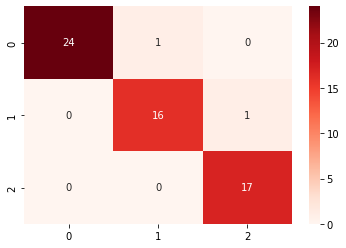

In [7]:
# Kirjoita toteutuksesi tähän soluun. 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#ennusteen tarkkuus ja sekaannusmatriisi
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Reds')

In [8]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tallenna vastauksesi acc- ja cm-muuttujiin.
print(f'Accuracy: {acc}')
print(f'Confusion matrix:\n {cm}')

Accuracy: 0.9661016949152542
Confusion matrix:
 [[24  1  0]
 [ 0 16  1]
 [ 0  0 17]]


# oma kommentti

Tässä lasketaan ennusteen tarkkuus valmiilla funktioilla vertaamalla ennustetta `y_pred` tähän asti erillään pidettyyn testiaineiston oikeaan arvoon `y_test`. Tarkkuus osoittautuu olevan aivan hyvä (mikä vanhaa bayesistia tietenkin miellyttää suuresti). Sekaannusmatriisin diagonaalilta näkyvät oikeaan osuneiden ennusteiden määrät kussakin luokassa. Siitä myös näkyy, kuinka pieleen menneitä ennusteita on vain kaksi kappaletta, molemmat matriisin yläkolmiossa. Viihtyvyyden lisäämiseksi matriisi on esitetty heatmappina. Punainen oli päivän väri.